In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import PIL.Image
import pandas as pd

# CNN

In [2]:
#df_CNN=pd.read_csv('CNN\\1confirmed-MNIST(nu=0.0005-then-0.00001, kernel = poly, gamma =auto,nu_out=100)with scores_asceding=True.csv')
df_CNN=pd.read_csv('Result of (AL with CNN) over MNIST.csv')
df_CNN[:30]

,Unnamed: 0,Train ACC,Valid ACC,Test ACC,Length of outliers,Time
0,0,tensor(1.),tensor(0.8802),0.8894,200.0,0.000000
1,1,tensor(1.),tensor(0.9296),0.8894,100.0,303.609110
2,2,tensor(1.),tensor(0.9387),0.9405,100.0,283.844819
3,3,tensor(1.),tensor(0.9423),0.9482,100.0,303.217986
4,4,tensor(1.),tensor(0.9474),0.9478,100.0,260.541893
5,5,tensor(1.),tensor(0.9471),0.9526,100.0,265.581519
6,6,tensor(1.),tensor(0.9442),0.9514,100.0,269.309245
7,7,tensor(1.),tensor(0.9573),0.9502,100.0,271.647634
8,8,tensor(1.),tensor(0.9492),0.9597,100.0,272.915813
9,9,tensor(1.),tensor(0.9554),0.9548,100.0,276.499906


In [3]:
nu_samples=df_CNN['Length of outliers'].values

In [4]:
Ratios=[]
for i in range(len(df_CNN)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_CNN['Ratios']=Ratios
#Ratios
df_CNN[:30]

,Unnamed: 0,Train ACC,Valid ACC,Test ACC,Length of outliers,Time,Ratios
0,0,tensor(1.),tensor(0.8802),0.8894,200.0,0.000000,0.33
1,1,tensor(1.),tensor(0.9296),0.8894,100.0,303.609110,0.50
2,2,tensor(1.),tensor(0.9387),0.9405,100.0,283.844819,0.67
3,3,tensor(1.),tensor(0.9423),0.9482,100.0,303.217986,0.83
4,4,tensor(1.),tensor(0.9474),0.9478,100.0,260.541893,1.00
5,5,tensor(1.),tensor(0.9471),0.9526,100.0,265.581519,1.17
6,6,tensor(1.),tensor(0.9442),0.9514,100.0,269.309245,1.33
7,7,tensor(1.),tensor(0.9573),0.9502,100.0,271.647634,1.50
8,8,tensor(1.),tensor(0.9492),0.9597,100.0,272.915813,1.67
9,9,tensor(1.),tensor(0.9554),0.9548,100.0,276.499906,1.83


# ResNet

In [5]:
df_Res=pd.read_csv('Result of (AL with ResNet) over MNIST.csv')
df_Res

,Unnamed: 0,Test ACC,Length of outliers,Time
0,0,0.9043,200.0,0.000000
1,1,0.9043,100.0,745.633413
2,2,0.9014,100.0,717.179478
3,3,0.8957,100.0,716.546453
4,4,0.9271,100.0,729.033441
5,5,0.9298,100.0,738.136840
6,6,0.9172,100.0,742.246573
7,7,0.9428,100.0,750.612859
8,8,0.9429,100.0,762.350942
9,9,0.9275,100.0,776.320829


In [6]:
nu_samples=df_Res['Length of outliers'].values

In [7]:
Ratios=[]
for i in range(len(df_Res)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_Res['Ratios']=Ratios
#Ratios
df_Res

,Unnamed: 0,Test ACC,Length of outliers,Time,Ratios
0,0,0.9043,200.0,0.000000,0.33
1,1,0.9043,100.0,745.633413,0.50
2,2,0.9014,100.0,717.179478,0.67
3,3,0.8957,100.0,716.546453,0.83
4,4,0.9271,100.0,729.033441,1.00
5,5,0.9298,100.0,738.136840,1.17
6,6,0.9172,100.0,742.246573,1.33
7,7,0.9428,100.0,750.612859,1.50
8,8,0.9429,100.0,762.350942,1.67
9,9,0.9275,100.0,776.320829,1.83


# LeNet

In [8]:
df_Le=pd.read_csv('Result of (AL with LeNet) over MNIST.csv')
df_Le

,Unnamed: 0,Test ACC,Length of outliers,Time
0,0,0.8072,200.0,0.000000
1,1,0.8139,100.0,201.516479
2,2,0.8190,100.0,233.344615
3,3,0.8242,100.0,207.367404
4,4,0.8305,100.0,203.190788
5,5,0.8380,100.0,200.065722
6,6,0.8436,100.0,197.595151
7,7,0.8473,100.0,224.373488
8,8,0.8520,100.0,215.312932
9,9,0.8592,100.0,197.617642


In [9]:
nu_samples=df_Le['Length of outliers'].values

In [10]:
Ratios=[]
for i in range(len(df_Le)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_Le['Ratios']=Ratios
#Ratios
df_Le

,Unnamed: 0,Test ACC,Length of outliers,Time,Ratios
0,0,0.8072,200.0,0.000000,0.33
1,1,0.8139,100.0,201.516479,0.50
2,2,0.8190,100.0,233.344615,0.67
3,3,0.8242,100.0,207.367404,0.83
4,4,0.8305,100.0,203.190788,1.00
5,5,0.8380,100.0,200.065722,1.17
6,6,0.8436,100.0,197.595151,1.33
7,7,0.8473,100.0,224.373488,1.50
8,8,0.8520,100.0,215.312932,1.67
9,9,0.8592,100.0,197.617642,1.83


In [11]:
len(df_CNN),len(df_Res),len(df_Le)

(75, 17, 19)

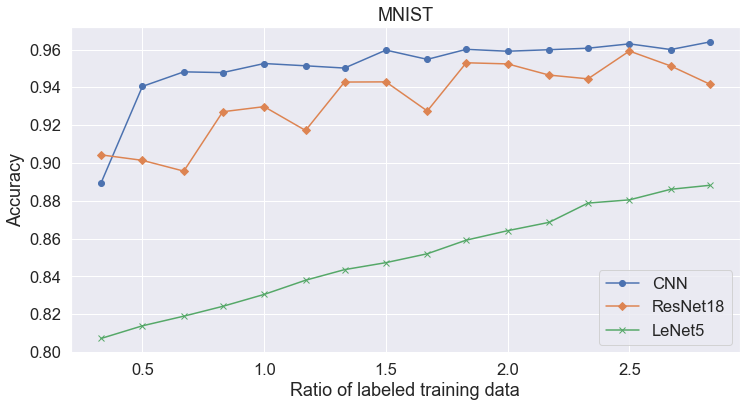

<Figure size 432x288 with 0 Axes>

In [12]:
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(12,6))
sns.set(font_scale=1.5)

plt.plot(df_CNN['Ratios'][:16],df_CNN['Test ACC'][1:17],marker='o')
plt.plot(df_Res['Ratios'][:16],df_Res['Test ACC'][1:17],marker='D')
plt.plot(df_Le['Ratios'][:16],df_Le['Test ACC'][:16],marker='x')
#plt.plot(df_Random['Ratios'][:16],df_Random['Test ACC'][:16],marker='o')



plt.title("MNIST")
plt.ylim=[0.55,1]
plt.ylabel("Accuracy")
plt.xlabel("Ratio of labeled training data")
plt.legend(['CNN', 'ResNet18','LeNet5'], loc='lower right')
plt.show()
plt.savefig('MNIST Accuracy.png')

# Time Analysis

In [13]:
CNN_time=np.round(sum(df_CNN['Time'][:16])/16)
Res_time=np.round(sum(df_Res['Time'][:16])/16)
Le_time=np.round(sum(df_Le['Time'][:16])/16)
#Random_time=round(sum(df_Random['Time'])/len(df_Random))
CNN_time,Res_time,Le_time

(265.0, 720.0, 173.0)

In [14]:
params=[61.7,305,11200]

In [15]:
Le_time=np.round(Le_time/CNN_time,3)
Res_time=np.round(Res_time/CNN_time)
CNN_time=1

In [16]:
times=np.array([Le_time,CNN_time,Res_time])#,VGG16_time,google_time,ResNet_time])#[2999000,4900000,4800000]
accr=[max(df_Le['Test ACC'][:6]),max(df_CNN['Test ACC'][:6]),max(df_Res['Test ACC'][:6])]
names=['LeNet5','CNN','ResNet18']#,'VGG16','GoogLeNet','ResNet']
arr=np.array([names,accr,times,params])
data=pd.DataFrame(arr.T,columns=['Models','accuracy','times','params(in 1000)'])
data

,Models,accuracy,times,params(in 1000)
0,LeNet5,0.838,0.653,61.7
1,CNN,0.9526,1.0,305
2,ResNet18,0.9298,3.0,11200


In [17]:
sns.set_theme(color_codes=True)

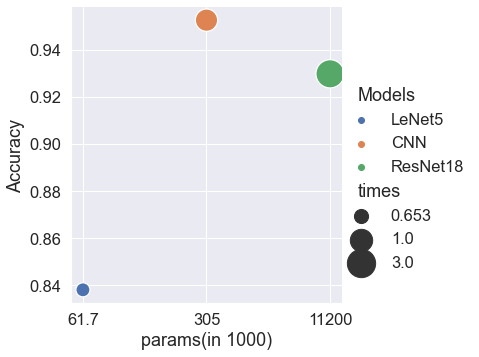

In [18]:
plt.rcParams.update({'font.size': 10})
from matplotlib import rcParams
#plt.figure(figsize=(12,6))
sns.set(font_scale=1.5)


#rcParams['figure.figsize'] = 25,18
sns.set(rc={'figure.figsize':(21.7,18.27)})
sns.set(font_scale=1.5)
sns.relplot(y=accr, x="params(in 1000)", size=data['times'], sizes=(800,200),hue="Models",data=data)

plt.ylabel("Accuracy")
plt.show()

In [19]:
max(df_Le['Test ACC'][:6]),max(df_CNN['Test ACC'][:6]),max(df_Res['Test ACC'][:6])

(0.838, 0.9526, 0.9298)